# Study - Deorbiting
This code intends to study the deorbiting strategies for a 3U Cubesat through orbital mechanics.  
The variables of interest are:
<ul>
    <li><b>Propellant Usage:</b> the approximate amount of propellant used for the different deorbiting strategies.</li>
    <li><b>Energy:</b> the approximate amount of power and energy used by the thruster in order to perform the maneuver.</li>
    <li><b>Time:</b> the amount of time needed for deorbiting on each scenario.</li>
</ul>

In [11]:
from maneuvers import Maneuvers
import auxiliary
import constants
import models
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# INITIAL CONDITIONS
coe,date = auxiliary.parseTle("suchai0.tle")
T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5
print("Period: ",T/60," min")
# SPACECRAFT DEFINITIONS
cubesat = models.Cubesat("3U")
cubesat.thruster = models.Thruster(thrust=1e-3, isp=720)

# MANEUVERING
naturalFall = Maneuvers(coe,cubesat,date)
# A Month of perturbations
naturalFall.addPerturbation("J2")
naturalFall.addPerturbation("atmosphere")
naturalFall.addPerturbation("solar_pressure")
naturalFall.addPerturbation("moon_gravity")
naturalFall.addPerturbation("sun_gravity")

naturalFall.propagate(60*60*24*30*5,60*10)

Period:  94.69923566813239  min
Propagating...from day  0.0  to  150.0


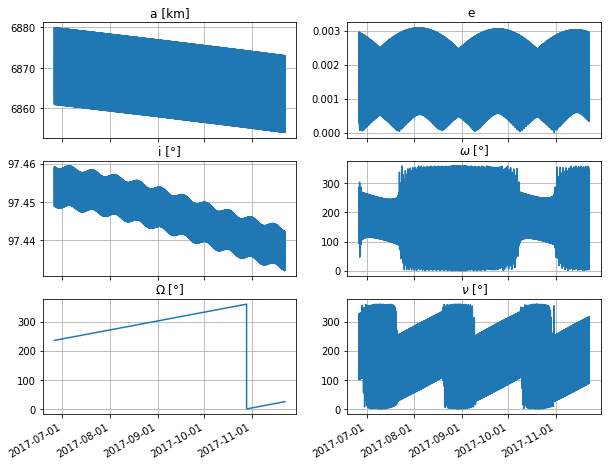

In [10]:
# PLOT
naturalFall.plot("coe")